# Proyecto: Clasificación de Actividades

## Importación de Datos

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import sklearn as skl
import numpy as np
import scipy as sci
from scipy.stats import mode
import re

raw=pd.read_csv('CREDITRISK_RAW.csv',delimiter=';',header=None)

#print(raw)

def get_stats(raw):
    data=raw.as_matrix()
    #print(data)
    PAGA_count=0
    x,y=[],[]
    for i in range(1,len(data)):
        xi,yi=[],[]
        for j in range(0,len(data[0])-1):
            xi.append(data[i][j])
        yi.append(data[i][len(data[0])-1])
        x.append(xi)
        y.append(yi)
     
    print("Cantidad de datos: {}".format(len(x)))
    print("Cantidad de características: {}".format(len(x[0])))
    #print(y[0])
    for i in range(0,len(y)):
        if y[i][0]=='PAGA':
            PAGA_count+=1
    print("Cuantos clientes pagan: {}/{}:".format(PAGA_count,len(data)))
    return

In [2]:
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

dataset = pd.read_csv('CREDITRISK_RAW.csv',delimiter=';')
dataset=dataset.dropna()
features = dataset.iloc[:, [1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18]]
y_data = dataset.iloc[:, [19]]
#data=dataset.as_matrix()

get_stats(dataset)



Cantidad de datos: 2239
Cantidad de características: 19
Cuantos clientes pagan: 1098/2240:


D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:17: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.


In [3]:
#target
#print(y_data)
print(len(y_data))
#y_data=y_data[1:len(y_data)]
labelencoder_y = LabelEncoder()
y_data = labelencoder_y.fit_transform(y_data)

print(len(y_data))
#-----------------------------------------------------------------------------
#Genero
gen = dataset.iloc[:, [1]]

#gen = gen[1:len(gen)]

labelencoder_edad = LabelEncoder()
gen = labelencoder_edad.fit_transform(gen)
#------------------------------------------------------------------------------
#Edad
edad = dataset.iloc[:, [3]]

#edad = edad[1:len(edad)]

#------------------------------------------------------------------------------
#Nivel Educacional
niv_ed = dataset.iloc[:, [4]]

#niv_ed = niv_ed[1:len(niv_ed)]

#------------------------------------------------------------------------------
#Nivel Educacional
renta = dataset.iloc[:, [2]]

#renta = renta[1:len(renta)]

#------------------------------------------------------------------------------
#Monto solicitado
monto = dataset.iloc[:, [13]]

#monto = monto[1:len(monto)]

#------------------------------------------------------------------------------
#Nivel Educacional
dias_mora = dataset.iloc[:, [14]]

#dias_mora = dias_mora[1:len(dias_mora)]

#labelencoder_gen = LabelEncoder()
#gen = labelencoder_edad.fit_transform(gen)



2240
2240


D:\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:111: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


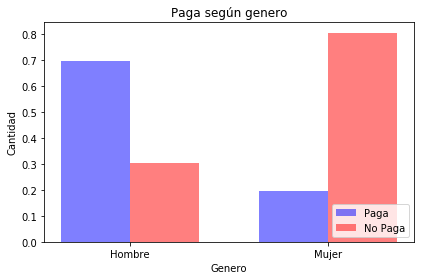

In [4]:
#grafico Genero
M_P,F_P,M_NP,F_NP=0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if gen[i]==0:
        if y_data[i]==1:
            F_P+=1
        else:
            F_NP+=1
    #hombre
    if gen[i]==1:
        if y_data[i]==1:
            M_P+=1
        else:
            M_NP+=1
            
            
from matplotlib.ticker import MaxNLocator
from collections import namedtuple

n_groups = 2

P_gen = (M_P/(M_P+M_NP),F_P/(F_P+F_NP))
NP_gen = (M_NP/(M_P+M_NP), F_NP/(F_P+F_NP))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_gen, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_gen, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Genero')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según genero')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Hombre', 'Mujer'))
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

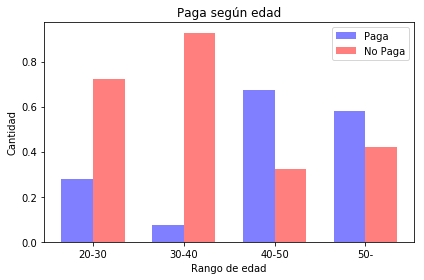

In [5]:
#grafico Edad

edad_arr=edad.values
edad_arr=np.reshape(edad_arr,-1)

P_20,NP_20,P_30,NP_30,P_40,NP_40,P_50,NP_50=0,0,0,0,0,0,0,0

for i in range(0,len(y_data)):
    #mujer
    if int(edad_arr[i])>=20 and int(edad_arr[i])<30:
        if y_data[i]==1:
            P_20+=1
        else:
            NP_20+=1
    if int(edad_arr[i])>=30 and int(edad_arr[i])<40:
        if y_data[i]==1:
            P_30+=1
        else:
            NP_30+=1
    if int(edad_arr[i])>=40 and int(edad_arr[i])<50:
        if y_data[i]==1:
            P_40+=1
        else:
            NP_40+=1
    if int(edad_arr[i])>=50 :
        if y_data[i]==1:
            P_50+=1
        else:
            NP_50+=1
    

n_groups = 4

P_edad = (P_20/(P_20+NP_20), P_30/(P_30+NP_30), P_40/(P_40+NP_40), P_50/(P_50+NP_50))
NP_edad = (NP_20/(P_20+NP_20), NP_30/(P_30+NP_30), NP_40/(P_40+NP_40), NP_50/(P_50+NP_50))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_edad, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_edad, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Rango de edad')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según edad')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('20-30', '30-40','40-50', '50-'))
ax.legend()

fig.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


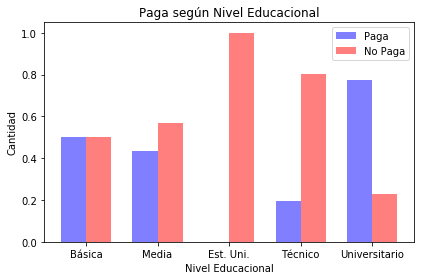

In [6]:
#grafico Nivel Educacional

niv_ed_arr=niv_ed.as_matrix()
niv_ed_arr=np.reshape(niv_ed_arr,-1)

P_Bas, NP_Bas, P_Eun, NP_Eun, P_Med, NP_Med, P_Tec, NP_Tec, P_Uni, NP_Uni = 0, 0, 0, 0, 0, 0, 0, 0, 0, 0

for i in range(0,len(y_data)):
    nivel = str(niv_ed_arr[i])
    nivel = re.sub(' +','',nivel)
    #Estudiante Universitario
    if nivel.upper() == 'EUN':       
        if y_data[i]==1:
            P_Eun+=1
        else:
            NP_Eun+=1
    #Basica
    if nivel.upper() == 'BAS':       
        if y_data[i]==1:
            P_Bas+=1
        else:
            NP_Bas+=1
    #Media
    if nivel.upper() == 'MED':        
        if y_data[i]==1:
            P_Med+=1
        else:
            NP_Med+=1
    #Tec
    if nivel.upper() == 'TEC':
        if y_data[i]==1:
            P_Tec+=1
        else:
            NP_Tec+=1
    #Uni
    if nivel.upper() == 'UNV':
        if y_data[i]==1:
            P_Uni+=1
        else:
            NP_Uni+=1

    

n_groups = 5

P_niv_ed = (P_Bas/(P_Bas+NP_Bas), P_Med/(P_Med+NP_Med), P_Eun/(P_Eun+NP_Eun), P_Tec/(P_Tec+NP_Tec), P_Uni/(P_Uni+NP_Uni))
NP_niv_ed = (NP_Bas/(P_Bas+NP_Bas), NP_Med/(P_Med+NP_Med), NP_Eun/(P_Eun+NP_Eun), NP_Tec/(P_Tec+NP_Tec), NP_Uni/(P_Uni+NP_Uni))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_niv_ed, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_niv_ed, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Nivel Educacional')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según Nivel Educacional')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Básica', 'Media', 'Est. Uni.', 'Técnico','Universitario'))
ax.legend()

fig.tight_layout()
plt.show()

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


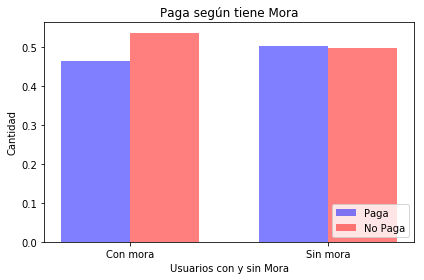

In [7]:
#grafico Mora

dias_mora_arr=dias_mora.as_matrix()
dias_mora_arr=np.reshape(dias_mora_arr,-1)
P_m, NP_m, P_nm, NP_nm = 0,0,0,0

for i in range(0,len(y_data)):
    #0 días
    if int(dias_mora_arr[i])==0:
        if y_data[i]==1:
            P_nm+=1
        else:
            NP_nm+=1
    if int(dias_mora_arr[i])>0 :
        if y_data[i]==1:
            P_m+=1
        else:
            NP_m+=1
    

n_groups = 2

P_dias_mora = (P_m/(P_m+NP_m), P_nm/(P_nm+NP_nm))
NP_dias_mora = (NP_m/(P_m+NP_m), NP_nm/(P_nm+NP_nm))

fig, ax = plt.subplots()

index = np.arange(n_groups)
bar_width = 0.35

opacity = 0.5
error_config = {'ecolor': '0.3'}

rects1 = ax.bar(index, P_dias_mora, bar_width,
                alpha=opacity, color='b', error_kw=error_config,
                label='Paga')

rects2 = ax.bar(index + bar_width, NP_dias_mora, bar_width,
                alpha=opacity, color='r', error_kw=error_config,
                label='No Paga')

ax.set_xlabel('Usuarios con y sin Mora')
ax.set_ylabel('Cantidad')
ax.set_title('Paga según tiene Mora')
ax.set_xticks(index + bar_width / 2)
ax.set_xticklabels(('Con mora','Sin mora'))
ax.legend(loc='lower right')

fig.tight_layout()
plt.show()

10.55
10
[142.  16.   0. ... 974.   0. 239.]
7.96
<class 'numpy.float64'>
[142000.  16000.      0. ... 974000.      0. 239000.]
7960000.0
<class 'numpy.float64'>


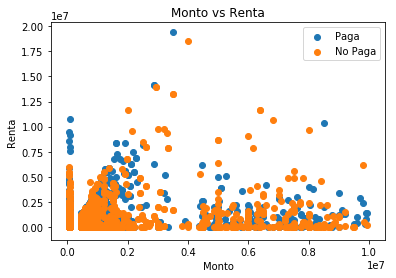

In [8]:
# MONTO vs RENTA

renta_arr=renta.values
renta_arr=np.reshape(renta_arr,-1)

monto_arr=monto.values
monto_arr=np.reshape(monto_arr,-1)

a=10.55
print(a)
print(int(a))

print(monto_arr)
print(monto_arr[4])
print(type(monto_arr[0]))

monto_P,monto_NP=[],[]
renta_P,renta_NP=[],[]

renta_arr = [w.replace('.', '') for w in renta_arr]

for i in range(0,len(monto_arr)):
    if monto_arr[i]-int(monto_arr[i])>0.0:
        monto_arr[i]=monto_arr[i]*1000
    monto_arr[i]=int(monto_arr[i])*1000

print(monto_arr)
print(monto_arr[4])
print(type(monto_arr[0]))

for i in range(0,len(renta_arr)):    
    if y_data[i]==1:
        monto_P.append(int(monto_arr[i]))
        renta_P.append(int(renta_arr[i]))
    else:
        monto_NP.append(int(monto_arr[i]))
        renta_NP.append(int(renta_arr[i]))

plt.scatter(renta_P,monto_P)
plt.scatter(renta_NP,monto_NP)
plt.legend(['Paga','No Paga'])
plt.xlabel('Monto')
plt.ylabel('Renta')
plt.title('Monto vs Renta')
plt.show()

In [9]:
features.dtypes

GENERO                       object
RENTA                        object
EDAD                        float64
NIV_EDUC                     object
E_CIVIL                      object
COD_OFI                       int64
COD_COM                      object
CIUDAD                       object
Crédito_1                    object
Crédito_2                    object
Crédito_3                    object
Crédito_4                    object
Monto solicitado            float64
Días de Mora                  int64
Monto Deuda Promedio        float64
Número de meses inactivo      int64
numero de cuotas              int64
Aval                         object
dtype: object

In [10]:
labelencoder_X = LabelEncoder()
features['GENERO'] = labelencoder_X.fit_transform(features['GENERO'])
features['NIV_EDUC'] = labelencoder_X.fit_transform(features['NIV_EDUC'])
features['E_CIVIL'] = labelencoder_X.fit_transform(features['E_CIVIL'])
features['CIUDAD'] = labelencoder_X.fit_transform(features['CIUDAD'])
features['Aval'] = labelencoder_X.fit_transform(features['Aval'])
print(features)
#print(features.values)

      GENERO      RENTA  EDAD  NIV_EDUC  E_CIVIL  COD_OFI COD_COM  CIUDAD  \
0          0    463.000  55.0         3        0       27     226      15   
1          0  1.200.000  59.0         3        0      121     226      15   
2          0    526.000  49.0         4        1       59      88      65   
3          1  1.500.000  47.0         5        1      138       1       4   
4          1  2.600.000  41.0         5        0       60     291      50   
5          0  1.250.000  30.0         3        2       63     300      10   
6          1    724.000  47.0         5        0      138       1       4   
7          1  1.196.000  53.0         5        0       27     226      15   
8          0    510.000  39.0         3        0       96     131      56   
9          1    685.000  51.0         5        0       82     108      65   
10         1    760.000  55.0         5        2      138       1       4   
11         1     57.300  40.0         5        0       90      80      65   

D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pyda

In [11]:
features.dtypes

GENERO                        int64
RENTA                        object
EDAD                        float64
NIV_EDUC                      int64
E_CIVIL                       int64
COD_OFI                       int64
COD_COM                      object
CIUDAD                        int64
Crédito_1                    object
Crédito_2                    object
Crédito_3                    object
Crédito_4                    object
Monto solicitado            float64
Días de Mora                  int64
Monto Deuda Promedio        float64
Número de meses inactivo      int64
numero de cuotas              int64
Aval                          int64
dtype: object

In [12]:
features_arr=features.values.copy()
print(features_arr[0])
print(features_arr[1])
print(features_arr[4])

for i in range(0,len(features_arr)):
    #RENTA
    features_arr[i][1]=int(re.sub('\.','',features_arr[i][1]))    
    features_arr[i][8]=int(re.sub('\.','',features_arr[i][8]))
    features_arr[i][9]=int(re.sub('\.','',features_arr[i][9]))
    features_arr[i][10]=int(re.sub('\.','',features_arr[i][10]))
    features_arr[i][11]=int(re.sub('\.','',features_arr[i][11]))
    #MONTO SoLICITADO
    if features_arr[i][12]-int(features_arr[i][12])>0.0:
        features_arr[i][12]=features_arr[i][12]*1000
    features_arr[i][12]=features_arr[i][12]*1000
    if features_arr[i][6] != ' ':
        features_arr[i][6]=int(features_arr[i][6])
    else:
        features_arr[i][6]=-1

#words = [w.replace('[br]', '<br />') for w in words]

print(features_arr[0])
print(features_arr[1])
print(features_arr[4])

[0 '463.000' 55.0 3 0 27 '226' 15 '0' '-4.030' '0' '292.673' 142.0 0 81.0
 1 18 0]
[0 '1.200.000' 59.0 3 0 121 '226' 15 '0' '0' '27.797.549' '0' 16.0 0
 34.519 1 60 0]
[1 '2.600.000' 41.0 5 0 60 '291' 50 '0' '115.440' '0' '4.500.000' 7.96 14
 4.566 3 77 1]
[0 463000 55.0 3 0 27 226 15 0 -4030 0 292673 142000.0 0 81.0 1 18 0]
[0 1200000 59.0 3 0 121 226 15 0 0 27797549 0 16000.0 0 34.519 1 60 0]
[1 2600000 41.0 5 0 60 291 50 0 115440 0 4500000 7960000.0 14 4.566 3 77 1]


In [13]:
array_features_paga = np.asarray(features_arr[y_data==1,:], dtype=np.float32)
array_features_no_paga = np.asarray(features_arr[y_data==0,:], dtype=np.float32)
sizeData_paga = array_features_paga.shape
sizeData_no_paga = array_features_no_paga.shape

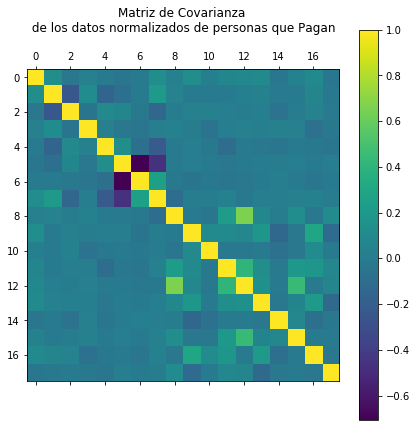

In [28]:
#Normalización
for column in range(0,sizeData_paga[1]):
    mean = np.mean(array_features_paga[:,column])
    std = np.std(array_features_paga[:,column])
    for row in range(0,sizeData_paga[0]):
        array_features_paga[row,column] = (array_features_paga[row,column]-mean)/std

#Matriz de Covarianza-Varianza
covar = np.dot(array_features_paga.transpose(),array_features_paga)/array_features_paga.shape[0]
covar.shape
plt.figure(figsize=(7,7))
figCovar = plt.matshow(covar,fignum=1)
var = plt.colorbar()
plt.title("Matriz de Covarianza \n de los datos normalizados de personas que Pagan \n")
plt.show()

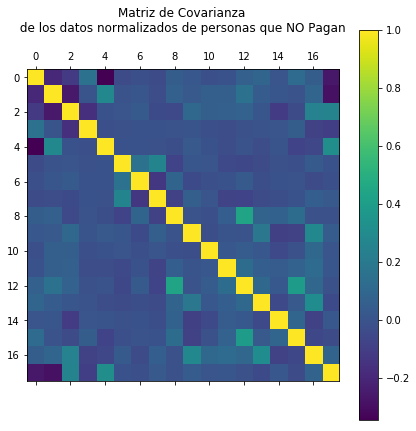

In [29]:
#Normalización
for column in range(0,sizeData_no_paga[1]):
    mean = np.mean(array_features_no_paga[:,column])
    std = np.std(array_features_no_paga[:,column])
    for row in range(0,sizeData_no_paga[0]):
        array_features_no_paga[row,column] = (array_features_no_paga[row,column]-mean)/std

#Matriz de Covarianza-Varianza
covar = np.dot(array_features_no_paga.transpose(),array_features_no_paga)/array_features_no_paga.shape[0]
covar.shape
plt.figure(figsize=(7,7))
figCovar = plt.matshow(covar,fignum=1)
var = plt.colorbar()
plt.title("Matriz de Covarianza \n de los datos normalizados de personas que NO Pagan \n")
plt.show()

In [16]:
# División de conjuntos de Entrenamiento, Test y Validacion
featEntVal, featTest, classEntVal, classTest = train_test_split(features_arr, y_data, test_size = 0.2, train_size = 0.8, stratify=y_data)
featEnt, featVal, classEnt, classVal = train_test_split(featEntVal, classEntVal, test_size = 0.25, stratify=classEntVal)

In [17]:
# Primer Clasificador con Redes Neuronales
clf1 = MLPClassifier(solver='lbfgs',activation="relu", hidden_layer_sizes = 20, early_stopping = True, validation_fraction = 0.25)
clf1.fit(featEntVal, classEntVal)
classPredict1 = clf1.predict(featVal)
confusionMatrix1 = confusion_matrix(classVal, classPredict1)

In [18]:
#Segundo Clasificador con SVM
from sklearn.preprocessing import StandardScaler

sFeatEnt = StandardScaler().fit(featEnt)
nFeatEnt = sFeatEnt.transform(featEnt)

sFeatVal = StandardScaler().fit(featVal)
nFeatVal = sFeatVal.transform(featVal)

sFeatTest = StandardScaler().fit(featTest)
nFeatTest = sFeatTest.transform(featTest)

from sklearn.svm import *

clf2 = LinearSVC()
clf2.fit(nFeatEnt, classEnt)
classPredict2 = np.argmax(clf2.decision_function(nFeatVal))
#confusionMatrix2 = confusion_matrix(classVal, classPredict2)

D:\Anaconda3\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [19]:
#Tercer Clasificador con Bayes
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(featEnt, classEnt)
GaussianNB(priors=None)
classPredict3 = clf3.predict(featVal)
confusionMatrix3 = confusion_matrix(classVal, classPredict3)

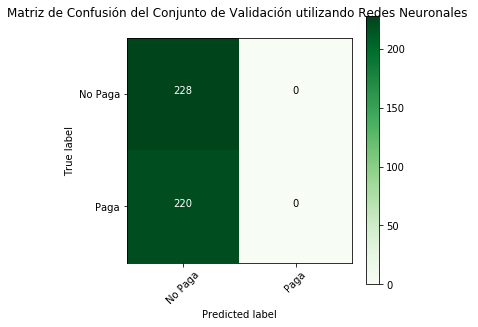

% de aciertos del clasificador es: 50.892857142857146


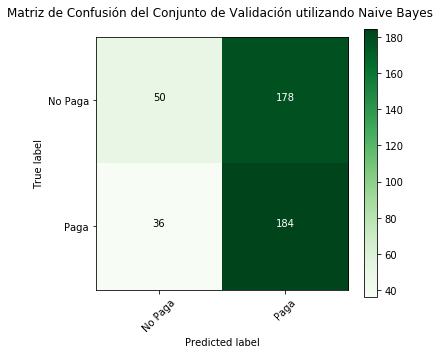

% de aciertos del clasificador es: 52.232142857142854


In [20]:
from functions import *
clases=['No Paga','Paga']
plot_confusion_matrix('d',True,confusionMatrix1,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Redes Neuronales \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix1)*100/featVal.shape[0]))
#plot_confusion_matrix('d',True,confusionMatrix2,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando SVM \n')
#print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix2)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix3,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Naive Bayes \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix3)*100/featVal.shape[0]))

In [21]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import mutual_info_classif
var_k = 6
selector = SelectKBest(score_func=mutual_info_classif, k=var_k).fit(featEnt, classEnt)

featEntValn= selector.transform(featEntVal)
featEntn= selector.transform(featEnt)
featValn=selector.transform(featVal)
featTestn=selector.transform(featTest)

scoresKBest = selector.scores_

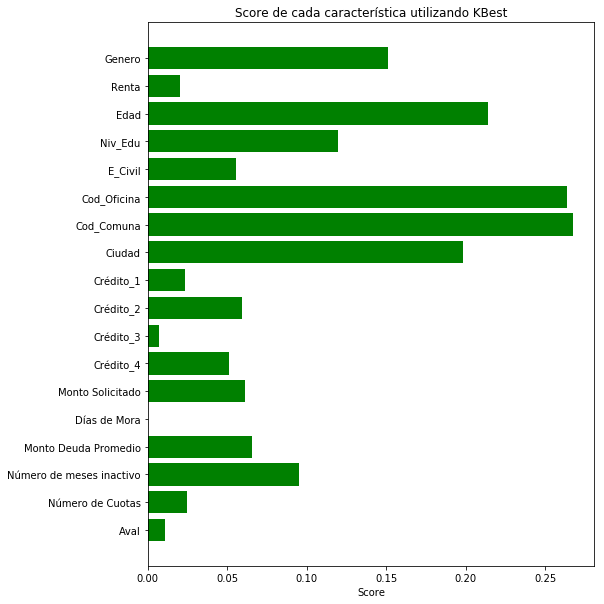

In [22]:
caractstr = ('Genero', 'Renta', 'Edad', 'Niv_Edu', 'E_Civil', 'Cod_Oficina', 'Cod_Comuna', 'Ciudad', 'Crédito_1', 'Crédito_2', 'Crédito_3', 'Crédito_4', 'Monto Solicitado', 'Días de Mora', 'Monto Deuda Promedio', 'Número de meses inactivo', 'Número de Cuotas', 'Aval')

plot_scores(selector, scoresKBest, caractstr)

In [23]:
#Nuevo Clasificador de Redes Neuronales
var_hidden = int(20)
clf4 = MLPClassifier(solver='lbfgs',activation="relu", hidden_layer_sizes = var_hidden, early_stopping = True, validation_fraction = 0.25)
clf4.fit(featEntValn, classEntVal)
classPredict4 = clf4.predict(featValn)
confusionMatrix4 = confusion_matrix(classVal, classPredict4)

In [24]:
#Nuevo Clasificador con Bayes
from sklearn.naive_bayes import GaussianNB
clf3 = GaussianNB()
clf3.fit(featEntn, classEnt)
GaussianNB(priors=None)
classPredict5 = clf3.predict(featValn)
confusionMatrix5 = confusion_matrix(classVal, classPredict5)

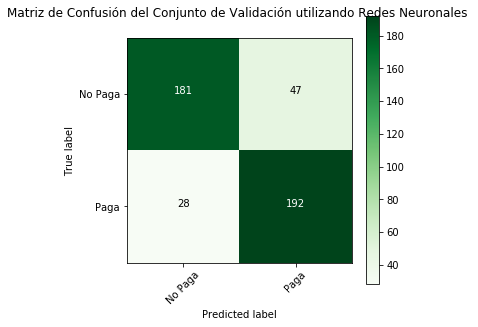

% de aciertos del clasificador es: 83.25892857142857


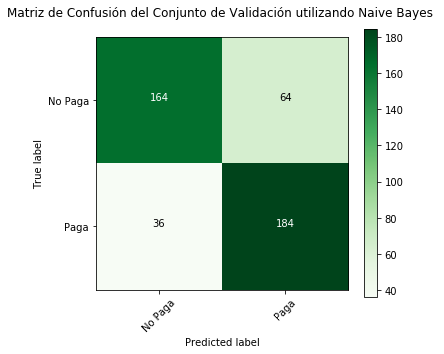

% de aciertos del clasificador es: 77.67857142857143


In [25]:
plot_confusion_matrix('d',True,confusionMatrix4,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Redes Neuronales \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix4)*100/featVal.shape[0]))
plot_confusion_matrix('d',True,confusionMatrix5,clases,clases,False,'Matriz de Confusión del Conjunto de Validación utilizando Naive Bayes \n')
print('% de aciertos del clasificador es: '+str(np.trace(confusionMatrix5)*100/featVal.shape[0]))